In [ ]:
"""The Dataset used for building this model has the following fields :
1.address
Candidate's address (if available).

2.career_objective
A brief summary of the candidate's career goals or objectives.

3.skills
List of skills possessed by the candidate (e.g., technical and soft skills)

4.educational_institution_name
Names of educational institutions attended by the candidate.

5.degree_names
Degrees obtained by the candidate (e.g., B.Tech, MBA).

6.passing_years
Year(s) of graduation or program completion.

7.educational_results
Results or grades achieved in the educational qualifications, such as GPA, percentage, or division.

8.result_types
The format or type of the educational results, such as GPA, percentage, or classification (e.g., Distinction).

9.major_field_of_studies
The main fields or subjects studied during the candidate’s education (e.g., Computer Science, Mathematics).

10.professional_company_names
Names of the companies or organizations where the candidate has worked professionally.

11.company_urls
RLs or websites of the professional companies mentioned by the candidate.

12.start_dates
The start dates of the candidate's employment or internships in various companies.

13.end_dates
The end dates of the candidate's employment or internships in various companies.

14.related_skils_in_job
A list of skills relevant to the candidate's job roles, as mentioned in their professional experience.

15.positions
The job positions or designations held by the candidate in their professional career.

16.locations
Locations or cities where the candidate has worked in various roles.

17.responsibilities
A description of the responsibilities and duties performed by the candidate in their job roles.

18.extra_curricular_activity_types
Types of extracurricular activities participated in by the candidate, such as leadership roles, volunteering, or sports.

19.extra_curricular_organization_names
Names of organizations associated with the candidate's extracurricular activities.

20.extra_curricular_organization_links
Links to websites or references related to the organizations involved in extracurricular activities.

21.role_positions
Specific roles held by the candidate in extracurricular activities or volunteer programs.

22.languages
A list of languages known by the candidate.

23.proficiency_levels
The level of proficiency in the languages mentioned (e.g., Beginner, Intermediate, Fluent).

24.certification_providers
Organizations or institutions that issued certifications obtained by the candidate.

25.certification_skills
Skills or areas of expertise acquired through certifications (e.g., Data Science, AWS).

26.online_links
Links to the candidate's online profiles, portfolios, or other relevant resources (e.g., LinkedIn, GitHub).

27.issue_dates
Dates when certifications or credentials were issued.

28.expiry_dates
Expiration dates of certifications, if applicable.

29.job_position_name
Specific job positions targeted by the candidate, as mentioned in the resume.

30.educationaL_requirements
Educational qualifications required for the job positions listed in the resume.

31.experiencere_requirement
Minimum experience required for the job positions listed in the resume.

32.age_requirement
Any age restrictions or requirements mentioned for specific job roles.

33.responsibilities.1
Additional or alternate descriptions of responsibilities associated with job roles.

34.skills_required
Skills explicitly required for the job positions listed in the resume.

35.matched_score
A numerical score that indicates the level of match between the candidate's profile and a specific job position

This is a rich datset that helps us with the goals set forth in this project"""


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import ast
from dateutil import parser

In [ ]:
resume_data = pd.read_csv('resume_data.csv')

In [ ]:
#Printing out the dataframe information
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   address                              784 non-null    object 
 1   career_objective                     4740 non-null   object 
 2   skills                               9488 non-null   object 
 3   educational_institution_name         9460 non-null   object 
 4   degree_names                         9460 non-null   object 
 5   passing_years                        9460 non-null   object 
 6   educational_results                  9460 non-null   object 
 7   result_types                         9460 non-null   object 
 8   major_field_of_studies               9460 non-null   object 
 9   professional_company_names           9460 non-null   object 
 10  company_urls                         9460 non-null   object 
 11  start_dates                   

In [ ]:
#Computing the null percentage for different fields
missing_percentage = resume_data.isnull().sum() / len(resume_data) * 100

missing_percentage

address                                91.785415
career_objective                       50.335289
skills                                  0.586756
educational_institution_name            0.880134
degree_names                            0.880134
passing_years                           0.880134
educational_results                     0.880134
result_types                            0.880134
major_field_of_studies                  0.880134
professional_company_names              0.880134
company_urls                            0.880134
start_dates                             0.880134
end_dates                               0.880134
related_skils_in_job                    0.880134
positions                               0.880134
locations                               0.880134
responsibilities                        0.000000
extra_curricular_activity_types        64.103101
extra_curricular_organization_names    64.103101
extra_curricular_organization_links    64.103101
role_positions      

/var/folders/bk/2rt82r897d5by239qbg9bx140000gn/T/ipykernel_26740/937189446.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_pct.values, y=missing_pct.index, palette="magma", legend = False)


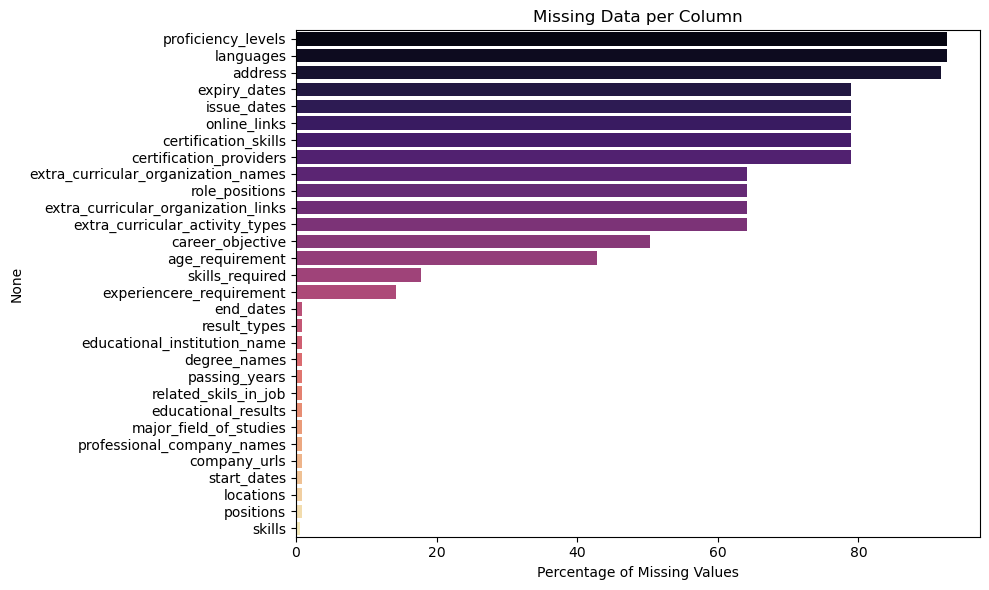

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

missing_pct = resume_data.isnull().mean().sort_values(ascending=False) * 100
missing_pct = missing_pct[missing_pct > 0]

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_pct.values, y=missing_pct.index, palette="magma", legend = False)
plt.xlabel("Percentage of Missing Values")
plt.title("Missing Data per Column")
plt.tight_layout()
plt.show()

In [ ]:
def combined_null(df, columns):
    all_null = df[columns].isnull().all(axis = 1)
    return 100 * all_null.sum() / len(df)


# 1. Languages group
language_group = ['languages', 'proficiency_levels']
print("Languages group null %:", combined_null(resume_data, language_group))

# 2. Extra-curricular group
extra_curricular_group = [
    'extra_curricular_activity_types',
    'extra_curricular_organization_names',
    'extra_curricular_organization_links',
    'role_positions'
]
print("Extra-curricular group null %:", combined_null(resume_data, extra_curricular_group))

# 3. Certification group
certification_group = [
    'certification_providers',
    'certification_skills',
    'online_links',
    'issue_dates',
    'expiry_dates'
]
print("Certification group null %:", combined_null(resume_data, certification_group))

Languages group null %: 92.66554903604359
Extra-curricular group null %: 64.10310142497904
Certification group null %: 78.96060352053647


In [ ]:
set(resume_data['online_links'])     #links are N/A or None can be dropped

{"['N/A']",
 '[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]',
 '[None, None, None, None, None, None]',
 '[None, None, None, None]',
 '[None, None, None]',
 '[None, None]',
 '[None]',
 nan}

In [ ]:
"""Since language , profiency_levels and address are too sparse , we will be dropping them"""
drop_columns = [
    'languages', 'proficiency_levels',
    'extra_curricular_activity_types', 'extra_curricular_organization_names',
    'extra_curricular_organization_links', 'role_positions',
    'address', 'online_links'
]

resume_data_updated = resume_data.drop(columns = drop_columns)

"""Retaining certfications column for its highere relevance for job fit and suggestions"""

'Retaining certfications column for its highere relevance for job fit and suggetsions'

In [ ]:
resume_data_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   career_objective              4740 non-null   object 
 1   skills                        9488 non-null   object 
 2   educational_institution_name  9460 non-null   object 
 3   degree_names                  9460 non-null   object 
 4   passing_years                 9460 non-null   object 
 5   educational_results           9460 non-null   object 
 6   result_types                  9460 non-null   object 
 7   major_field_of_studies        9460 non-null   object 
 8   professional_company_names    9460 non-null   object 
 9   company_urls                  9460 non-null   object 
 10  start_dates                   9460 non-null   object 
 11  end_dates                     9460 non-null   object 
 12  related_skils_in_job          9460 non-null   object 
 13  pos

In [ ]:
##Certifcication_providers, certification_skills, online_links, issue_dates, expiry_dates, urls

In [ ]:
pd.set_option('display.max_columns', None)
resume_data_updated[:2]

In [ ]:
#Converting objects to strings for relevant fields
list_columns = [
    'skills', 'educational_institution_name', 'degree_names', 'passing_years',
    'educational_results', 'result_types', 'major_field_of_studies',
    'professional_company_names', 'company_urls', 'start_dates', 'end_dates',
    'related_skils_in_job', 'positions', 'locations', 'certification_providers',
    'certification_skills', 'issue_dates', 'expiry_dates'
]

for col in list_columns:
    resume_data_updated[col] = resume_data_updated[col].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)

In [ ]:
#Parsing dates to ensure date similarity
import pandas as pd
from dateutil import parser

def parse_dates(date_list):
    """Parses a list of date strings into Timestamp objects, handling 'Present' values."""
    parsed_dates = []
    if isinstance(date_list, list):
        for date in date_list:
            if pd.isna(date):
                parsed_dates.append(None)
            elif isinstance(date, str):
                if date.lower() not in ['n/a', 'till date', 'current', 'present', 'ongoing']:
                    try:
                        dt = parser.parse(date, fuzzy=True)
                        parsed_dates.append(pd.Timestamp(year=dt.year, month=dt.month, day=1))
                    except Exception:
                        parsed_dates.append(None)
                else:
                    parsed_dates.append(pd.Timestamp.today())
            else:
                parsed_dates.append(None)
    else:
        parsed_dates.append(None)
    return parsed_dates

resume_data_updated['start_dates'] = resume_data_updated['start_dates'].apply(parse_dates)
resume_data_updated['end_dates'] = resume_data_updated['end_dates'].apply(parse_dates)


In [ ]:
def compute_total_experience(start_dates, end_dates):
    total_months = 0
    if isinstance(start_dates, list) and isinstance(end_dates, list):
        for start, end in zip(start_dates, end_dates):                           #grouping start and end dtaes together to computet experience
            if pd.notna(start) and pd.notna(end):
                months = (end.year - start.year) * 12 + (end.month - start.month)
                if months > 0:
                    total_months += months
    return round(total_months / 12, 2)                           # in years
resume_data_updated['experience_years'] = resume_data_updated.apply(lambda row: compute_total_experience(row['start_dates'], row['end_dates']), axis=1)




In [ ]:
#Converting Job Roles to Categorical Value
resume_data_updated['job_position_name'] = resume_data_updated['job_position_name'].str.strip()

resume_data_updated['job_position_name'] = resume_data_updated['job_position_name'].astype('category')

In [ ]:
resume_data_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   career_objective              4740 non-null   object  
 1   skills                        9488 non-null   object  
 2   educational_institution_name  9460 non-null   object  
 3   degree_names                  9460 non-null   object  
 4   passing_years                 9460 non-null   object  
 5   educational_results           9460 non-null   object  
 6   result_types                  9460 non-null   object  
 7   major_field_of_studies        9460 non-null   object  
 8   professional_company_names    9460 non-null   object  
 9   company_urls                  9460 non-null   object  
 10  start_dates                   9544 non-null   object  
 11  end_dates                     9544 non-null   object  
 12  related_skils_in_job          9460 non-null   ob

In [ ]:
resume_data_updated

In [ ]:
#Cleaning list values in the dataset
def clean_list_values(lst):
    if isinstance(lst, list):
        cleaned = []
        for x in lst:
            try:
                # Skip empty arrays or ambiguous objects
                if isinstance(x, (np.ndarray, list)) and len(x) == 0:
                    continue
                if pd.notna(x) and isinstance(x, str):
                    x_clean = x.strip().lower()
                    if x_clean not in ['n/a', 'none', '', ' ']:
                        cleaned.append(x_clean)
                elif pd.notna(x):
                    cleaned.append(x)  # Keep non-string valid types
            except:
                continue
        return cleaned
    return []

list_columns = ['skills', 'degree_names', 'positions', 'related_skils_in_job', 'educational_institution_name', 'educational_results', 'result_types', 'professional_company_names', 'major_field_of_studies']

for col in list_columns:
    resume_data_updated[col] = resume_data_updated[col].apply(clean_list_values)



In [ ]:
resume_data_updated['job_position_name'].value_counts()

job_position_name
Civil Engineer                                                                             342
Site Engineer                                                                              342
Project Coordinator (Civil)                                                                342
HR Officer                                                                                 342
AI Engineer                                                                                341
Asst. Manager/ Manger (Administrative)                                                     341
Sr.Officer / Executive - Internal Audit                                                    341
Senior Software Engineer                                                                   341
Network Support Engineer                                                                   341
Mechanical Engineer                                                                        341
Mechanical Designer             

In [ ]:
#Considering roles that are relevant to the IT industry
relevant_roles = [
    'AI Engineer',
    'Senior Software Engineer',
    'Network Support Engineer',
    'System Administrator (Operation & Maintenance of Server, Storage & Service Desk System)',
    'Database Administrator (DBA)',
    'Business Development Executive',
    'Machine Learning (ML) Engineer',
    'Full Stack Developer (Python,React js)',
    'Executive/ Sr. Executive -IT',
    'DevOps Engineer',
    'Data Science Engineer',
    'Senior iOS Engineer',
    'Data Engineer',
    'Intern (Generative AI Engineering - 2D/3D Image Generation)'
]

resume_data_updatedroles = resume_data_updated[resume_data_updated['job_position_name'].isin(relevant_roles)].copy()



In [ ]:
resume_data_updatedroles.isnull().sum()

career_objective                2398
skills                             0
educational_institution_name       0
degree_names                       0
passing_years                     42
educational_results                0
result_types                       0
major_field_of_studies             0
professional_company_names         0
company_urls                      42
start_dates                        0
end_dates                          0
related_skils_in_job               0
positions                          0
locations                         42
responsibilities                   0
certification_providers         3760
certification_skills            3760
issue_dates                     3760
expiry_dates                    3760
job_position_name                  0
educational_requirements           0
experiencere_requirement         681
age_requirement                 2723
responsibilities.1                 0
skills_required                 1701
matched_score                      0
e

In [ ]:
set(resume_data_updatedroles['company_urls'].explode())

In [ ]:
set(resume_data_updatedroles['locations'].explode())

In [ ]:
set(resume_data_updatedroles['age_requirement'])

In [ ]:
resume_data_updatedroles['age_requirement'].value_counts()

In [ ]:
#Since candidate age could involve apotential bias with selection we will be dropping it.

In [ ]:
resume_data_updatedroles['experiencere_requirement'].value_counts()

experiencere_requirement
At least 1 year       682
At least 3 years      681
1 to 3 years          341
4 to 5 years          341
At least 5 year(s)    340
At least 4 years      340
3 to 5 years          340
5 to 8 years          340
3 to 7 years          340
At least 2 years      340
Name: count, dtype: int64

In [ ]:
#Adjusting to int value:
import re

def extract_min_experience(exp_text):
    if isinstance(exp_text, str):
        numbers = re.findall(r'\d+', exp_text)
        if numbers:
            return int(min(map(int, numbers)))
    return 0

resume_data_updatedroles['min_experiencere_requirement'] = resume_data_updatedroles['experiencere_requirement'].apply(extract_min_experience)


In [ ]:
resume_data_updatedroles['min_experiencere_requirement'].value_counts()

min_experiencere_requirement
3    1361
1    1023
4     681
0     681
5     680
2     340
Name: count, dtype: int64

In [ ]:
# Can drop experiencere requirement

In [ ]:
pd.set_option('display.max_rows', None)
resume_data_updatedroles['passing_years'].value_counts()

passing_years
[2019]                                                                                                 714
[2020]                                                                                                 532
[2017, 2019]                                                                                           224
[N/A]                                                                                                  210
[2018]                                                                                                 210
[2021]                                                                                                 182
[2018, 2020]                                                                                           140
[None]                                                                                                 112
[N/A, N/A]                                                                                              98
[2019, 2021]           

In [ ]:
from dateutil import parser
from datetime import datetime

def clean_passing_years(year_list):
    if not isinstance(year_list, list):
        return None

    cleaned_years = []
    current_year = datetime.today().year

    for item in year_list:
        # Handle Python None or NaN directly
        if item is None or (isinstance(item, float) and np.isnan(item)):
            continue

        item_str = str(item).strip().lower()

        # Handle 'present', 'current', etc.
        if item_str in ['present', 'current', 'ongoing']:
            cleaned_years.append(current_year)
            continue

        # Handle known bad formats or placeholders
        if item_str in ['n/a', 'na', 'expected', '20xx', 'month and year received/expected']:
            continue

        # Match exact year (like "2019")
        if re.match(r'^(19|20)\d{2}$', item_str):
            cleaned_years.append(int(item_str))
            continue

        # Attempt parsing partial dates (e.g., "May 2014")
        try:
            dt = parser.parse(item_str, fuzzy=True)
            year = dt.year
            if 1900 <= year <= current_year:
                cleaned_years.append(year)
        except:
            continue

    return cleaned_years if cleaned_years else None

resume_data_updatedroles['passing_years'] = resume_data_updatedroles['passing_years'].apply(clean_passing_years)

In [ ]:
pd.set_option('display.max_rows', None)
resume_data_updatedroles['passing_years'].value_counts(dropna=False)

passing_years
[2019]                                                                714
None                                                                  658
[2020]                                                                532
[2017, 2019]                                                          224
[2018]                                                                210
[2021]                                                                182
[2018, 2020]                                                          140
[2025]                                                                 84
[2015]                                                                 70
[2019, 2021]                                                           70
[2013]                                                                 56
[2014]                                                                 56
[2006]                                                                 56
[2010]                  

In [ ]:
resume_data_updatedroles = resume_data_updatedroles.drop(columns=['experiencere_requirement', 'age_requirement', 'company_urls'])

In [ ]:
#Dropping start and end dates in the dataframe as the timelines are saved in the experience years column
resume_data_updatedroles = resume_data_updatedroles.drop(columns=['start_dates', 'end_dates'])

In [ ]:
resume_data_updatedroles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4766 entries, 0 to 9540
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   career_objective              2368 non-null   object  
 1   skills                        4766 non-null   object  
 2   degree_names                  4766 non-null   object  
 3   passing_years                 4108 non-null   object  
 4   educational_results           4766 non-null   object  
 5   result_types                  4766 non-null   object  
 6   major_field_of_studies        4766 non-null   object  
 7   related_skils_in_job          4766 non-null   object  
 8   positions                     4766 non-null   object  
 9   responsibilities              4766 non-null   object  
 10  certification_providers       1006 non-null   object  
 11  certification_skills          1006 non-null   object  
 12  issue_dates                   1006 non-null   object 

In [ ]:
#Similarly Avoiding Company name to reduce any further bias
resume_data_updatedroles = resume_data_updatedroles.drop(columns=['professional_company_names', 'locations'])

In [ ]:
resume_data_updatedroles = resume_data_updatedroles.drop(columns=['educational_institution_name'])

In [ ]:
resume_data_updatedroles.isnull().sum()

career_objective                2398
skills                             0
degree_names                       0
passing_years                    658
educational_results                0
result_types                       0
major_field_of_studies             0
related_skils_in_job               0
positions                          0
responsibilities                   0
certification_providers         3760
certification_skills            3760
issue_dates                     3760
expiry_dates                    3760
job_position_name                  0
educational_requirements           0
responsibilities.1                 0
skills_required                 1701
matched_score                      0
experience_years                   0
min_experiencere_requirement       0
dtype: int64

In [ ]:
# Since 14% of the candidates dont have a passing year we will be dropping them
updated_resume_data = resume_data_updatedroles[resume_data_updatedroles['passing_years'].notnull()].copy()

In [ ]:
updated_resume_data.isnull().sum()

career_objective                1922
skills                             0
degree_names                       0
passing_years                      0
educational_results                0
result_types                       0
major_field_of_studies             0
related_skils_in_job               0
positions                          0
responsibilities                   0
certification_providers         3256
certification_skills            3256
issue_dates                     3256
expiry_dates                    3256
job_position_name                  0
educational_requirements           0
responsibilities.1                 0
skills_required                 1466
matched_score                      0
experience_years                   0
min_experiencere_requirement       0
dtype: int64

In [ ]:
updated_resume_data['degree_names'].value_counts()

In [ ]:
updated_resume_data['result_types'].value_counts()

In [ ]:
updated_resume_data['educational_results'].value_counts()

In [ ]:
updated_resume_data['has_double_degree'] = updated_resume_data['passing_years'].apply(
    lambda x: len(x) > 1 if isinstance(x, list) else False
)

def get_most_recent_index(passing_years):
    if isinstance(passing_years, list) and passing_years:
        try:
            return passing_years.index(max(passing_years))
        except:
            return None
    return None

def get_latest_degree(row):
    idx = get_most_recent_index(row['passing_years'])
    if idx is not None and isinstance(row['degree_names'], list) and idx < len(row['degree_names']):
        return row['degree_names'][idx]
    return None

def get_latest_result(row):
    idx = get_most_recent_index(row['passing_years'])
    if idx is not None and isinstance(row['educational_results'], list) and idx < len(row['educational_results']):
        return row['educational_results'][idx]
    return None

updated_resume_data['latest_grad_year'] = updated_resume_data['passing_years'].apply(lambda x: max(x) if isinstance(x, list) and x else None)
updated_resume_data['latest_degree'] = updated_resume_data.apply(get_latest_degree, axis=1)
updated_resume_data['latest_result'] = updated_resume_data.apply(get_latest_result, axis=1)





In [ ]:
updated_resume_data['latest_result'].value_counts(dropna=False)

latest_result
None                                  3292
4.0                                     70
3.6                                     42
3.5                                     42
3.4                                     42
gold medalist                           28
3.7                                     28
3.8                                     28
3.1                                     28
3.85                                    14
3.9/4.0                                 14
3.91                                    14
ranking: 1st of 82 students             14
3.83                                    14
second upper class honors               14
cpa qualified candidate                 14
cum laude - graduating with honors      14
gpa: 3.8                                14
3.35/4.0                                14
a average                               14
3.67                                    14
3.15                                    14
4.00                                    

In [ ]:
updated_resume_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4108 entries, 0 to 9540
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   career_objective              2186 non-null   object  
 1   skills                        4108 non-null   object  
 2   major_field_of_studies        4108 non-null   object  
 3   related_skils_in_job          4108 non-null   object  
 4   positions                     4108 non-null   object  
 5   responsibilities              4108 non-null   object  
 6   certification_providers       852 non-null    object  
 7   certification_skills          852 non-null    object  
 8   issue_dates                   852 non-null    object  
 9   expiry_dates                  852 non-null    object  
 10  job_position_name             4108 non-null   category
 11  educational_requirements      4108 non-null   object  
 12  responsibilities.1            4108 non-null   object 

In [ ]:
updated_resume_data = updated_resume_data.drop(columns = ['educational_results', 'passing_years', 'degree_names', 'result_types'])

In [ ]:
def normalize_result(val):
    try:
        val = str(val).lower().strip()
        #print("val : "+val+ "\n")

        # Remove unwanted characters
        val = val.replace("gpa:", "").replace("cpa", "").replace("(", "").replace(")", "").strip()

        # Handle pure GPA like "3.5", "4.0", "3.9/4.0", "3.52 / 4.0"
        if "/" in val:
            num, denom = val.split("/")
            return round(float(num) / float(denom) * 4.0, 2)
        if re.match(r'^\d+(\.\d+)?$', val):
            gpa = float(val)
            #print(gpa)
            if 11 <= gpa <= 100:
                #print(round(val_num / 25, 2))
                return round(val_num / 25, 2)    #percentage
            elif gpa <= 4.0:
                #print(round(min(gpa, 4.0), 2))
                return round(min(gpa, 4.0), 2)  #4.0 point scale
            else:
                #print(round(gpa / 10 * 4.0, 2))
                return round(gpa / 10 * 4.0, 2)  # 10-point scale
        if "%" in val:
            val_num = float(val.replace("%", "").strip())
            #print(val_num)
            if 0 <= val_num <= 100:
                #print(round(val_num / 25, 2))
                return round(val_num / 25, 2)  # scale to 4.0
            else:
                return None  # invalid %

        if re.match(r'\d+(\.\d+)?\s*(till', val):
            gpa = float(val.split()[0])
            #print(gpa," hi ", round(gpa / 10 * 4.0, 2))
            return round(gpa / 10 * 4.0, 2)

        # Handle honors and qualitative tags
        if "first" in val or "gold" in val or "magna" in val:
            return 4.0
        if "cum laude" in val or "distinction" in val:
            return 3.8
        if "second upper" in val:
            return 3.5
        if "average" in val:
            return 3.0
        if "ranking" in val:
            return 3.9  # Assume top rank implies high GPA

    except:
        return None

    return None

updated_resume_data['normalized_result'] = updated_resume_data['latest_result'].apply(normalize_result)

In [ ]:
updated_resume_data['normalized_result'].value_counts(dropna=False)

In [ ]:
updated_resume_data.iloc[[21]]

,career_objective,skills,major_field_of_studies,related_skils_in_job,positions,responsibilities,certification_providers,certification_skills,issue_dates,expiry_dates,...,responsibilities.1,skills_required,matched_score,experience_years,min_experiencere_requirement,has_double_degree,latest_grad_year,latest_degree,latest_result,normalized_result
45,NaN,"[c/python, r, stk, catia, ansys, latex, solidw...","[mathematics, physics, chemistry, engineering,...",[],"[engineering intern, tutor, mechanical design ...",Data Platform Design\nData Pipeline Developmen...,"[Scrum Fundamentals, Data Science Fundamentals...","[None, None, [SQL]]","[N/A, N/A, N/A]","[None, None, None]",...,Data Platform Design\nData Pipeline Developmen...,Azure\nBig Data\nData Analytics\nETL Tools\nPo...,0.783333,2.33,5,True,2017,"bachelor of science, be bachelor of engineerin...",None,NaN


In [ ]:
updated_resume_data = updated_resume_data.drop(columns= ['career_objective'])

In [ ]:
updated_resume_data['certification_skills'].value_counts()

In [ ]:
def merge_responsibilities(row):
    parts = []
    if pd.notnull(row['responsibilities']):
        parts.append(str(row['responsibilities']).strip())
    if pd.notnull(row['responsibilities.1']):
        parts.append(str(row['responsibilities.1']).strip())
    return " ".join(parts) if parts else None

updated_resume_data['combined_responsibilities'] = updated_resume_data.apply(merge_responsibilities, axis=1)

In [ ]:
updated_resume_data = updated_resume_data.drop(columns= ['responsibilities', 'responsibilities.1'])

In [ ]:
updated_resume_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4108 entries, 0 to 9540
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   skills                        4108 non-null   object  
 1   major_field_of_studies        4108 non-null   object  
 2   related_skils_in_job          4108 non-null   object  
 3   positions                     4108 non-null   object  
 4   certification_providers       852 non-null    object  
 5   certification_skills          852 non-null    object  
 6   issue_dates                   852 non-null    object  
 7   expiry_dates                  852 non-null    object  
 8   job_position_name             4108 non-null   category
 9   educational_requirements      4108 non-null   object  
 10  skills_required               2642 non-null   object  
 11  matched_score                 4108 non-null   float64 
 12  experience_years              4108 non-null   float64

In [ ]:
def flatten_skills(skills_field):
    if isinstance(skills_field, list):
        # Flatten if nested lists are present
        flat = []
        for item in skills_field:
            if isinstance(item, list):
                flat.extend(item)
            else:
                flat.append(item)
        return flat
    return []
updated_resume_data['related_skils_in_job_flat'] = updated_resume_data['related_skils_in_job'].apply(flatten_skills)

In [ ]:
def combine_skills(row):
    s1 = row['skills'] if isinstance(row['skills'], list) else []
    s2 = row['related_skils_in_job_flat'] if isinstance(row['related_skils_in_job_flat'], list) else []
    return list(set(s1 + s2))  # remove duplicates

updated_resume_data['combined_skills'] = updated_resume_data.apply(combine_skills, axis = 1)

In [ ]:
updated_resume_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4108 entries, 0 to 9540
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   skills                        4108 non-null   object  
 1   major_field_of_studies        4108 non-null   object  
 2   related_skils_in_job          4108 non-null   object  
 3   positions                     4108 non-null   object  
 4   certification_providers       852 non-null    object  
 5   certification_skills          852 non-null    object  
 6   issue_dates                   852 non-null    object  
 7   expiry_dates                  852 non-null    object  
 8   job_position_name             4108 non-null   category
 9   educational_requirements      4108 non-null   object  
 10  skills_required               2642 non-null   object  
 11  matched_score                 4108 non-null   float64 
 12  experience_years              4108 non-null   float64

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
updated_resume_data.iloc[[0]]

In [ ]:
updated_resume_data = updated_resume_data.drop(columns= ['skills', 'related_skils_in_job', 'related_skils_in_job_flat'])

In [ ]:
updated_resume_data.info()

In [ ]:
updated_resume_data['issue_dates'].value_counts(dropna=False)

In [ ]:
updated_resume_data['expiry_dates'].value_counts(dropna=False)

In [ ]:
updated_resume_data['certification_providers'].value_counts(dropna=False)

In [ ]:
updated_resume_data['certification_skills'].value_counts(dropna=False)

In [ ]:
PROFICIENCY_TERMS = {'advanced', 'intermediate', 'user', 'beginner', 'expert'}

def clean_cert_skills(skill_list):
    if isinstance(skill_list, list):
        flat = []
        for skill in skill_list:
            if isinstance(skill, list):
                flat.extend(skill)
            else:
                flat.append(skill)
        return [s.strip().lower() for s in flat if s and s.strip().lower() not in PROFICIENCY_TERMS]
    return []

updated_resume_data['cert_skills_flat'] = updated_resume_data['certification_skills'].apply(clean_cert_skills)

In [ ]:
updated_resume_data['cert_skills_flat'].value_counts(dropna=False)

cert_skills_flat
[]                                                                                                                                        3786
[python]                                                                                                                                    28
[volunteer income tax assistance, tax counseling for the elderly]                                                                           14
[epa certification]                                                                                                                         14
[big data analysis, hadoop]                                                                                                                 14
[data science, nlp]                                                                                                                         14
[project management]                                                                                                         

In [ ]:
def combine_cert_skills_and_providers(row):
    skills = row['cert_skills_flat'] if isinstance(row['cert_skills_flat'], list) else []
    providers = row['certification_providers'] if isinstance(row['certification_providers'], list) else []
    return list(set(skills + providers))

updated_resume_data['cert_combined_skills'] = updated_resume_data.apply(combine_cert_skills_and_providers, axis=1)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
updated_resume_data.iloc[[45]]

,major_field_of_studies,positions,certification_providers,certification_skills,issue_dates,expiry_dates,job_position_name,educational_requirements,skills_required,matched_score,experience_years,min_experiencere_requirement,has_double_degree,latest_grad_year,latest_degree,latest_result,normalized_result,combined_responsibilities,combined_skills,cert_skills_flat,cert_combined_skills
89,"[computer science, computer science]","[computer science teacher, software engineer, junior software engineer]","[AWS, CSM]","[None, None]","[None, None]","[None, None]",DevOps Engineer,Bachelor/Honors,Ansible\nAWS Cloud\nCloud Platform\nDevOps\nDockers and Kubernetes\nJava\nReactJS\nTerraform,0.85,13.0,3,True,2015,master of science,None,NaN,Open-Source Technologies\nCI/CD Culture & Tooling\nProduct Availability & Scalability\nAutomation (Build & Deploy)\nMonitoring & Reliability\nInfrastructure Innovation\nSoftware Engineering Velocity\nInfrastructure Resiliency\nSecurity & Data Availability Open-Source Technologies\nCI/CD Culture & Tooling\nProduct Availability & Scalability\nAutomation (Build & Deploy)\nMonitoring & Reliability\nInfrastructure Innovation\nSoftware Engineering Velocity\nInfrastructure Resiliency\nSecurity & Data Availability,"[python, javascript (angular), data analysis, patience, css, algorithm design, git, html, interpersonal communication, technical writing]",[],"[AWS, CSM]"


In [ ]:
def combine_skills(row):
    s1 = row['combined_skills'] if isinstance(row['combined_skills'], list) else []
    s2 = row['cert_combined_skills'] if isinstance(row['cert_combined_skills'], list) else []
    return list(set(s1 + s2))  # remove duplicates

updated_resume_data['combined_skills'] = updated_resume_data.apply(combine_skills, axis = 1)

In [ ]:
updated_resume_data = updated_resume_data.drop(columns = ['cert_skills_flat', 'cert_combined_skills', 'expiry_dates', 'issue_dates', 'certification_skills', 'certification_providers'])



In [ ]:
updated_resume_data.info()

In [ ]:
updated_resume_data['skills_required'].value_counts(dropna=False)

skills_required
NaN                                                                                                                                                                      1466
Fast typing skill\nIELTSInternet browsing & online work ability.                                                                                                          294
ASP.NET MVC Strong understanding of database design\nDatabase Administrator (DBA)\nDatabase management\nElasticsearch\nMongoDB\nMySQL database\nNoSQL database\nREDIS     294
Cisco\nLinux\nOperation & Maintenance of Server                                                                                                                           294
CCNA (Cisco Certified Network Associate)\nGPON\nHardware & Networking\nIIG\nISP\nIT Enabled services\nOLT and ONU                                                         294
Python\nR or Java\nTensorFlow\nPyTorch\nScikit-learn.                                                             

In [ ]:
def split_newline_to_list(text):
    if isinstance(text, str):
        return [t.strip().lower() for t in text.split('\n') if t.strip()]
    return []

# Apply to both fields
updated_resume_data['combined_responsibilities'] = updated_resume_data['combined_responsibilities'].apply(split_newline_to_list)
updated_resume_data['skills_required'] = updated_resume_data['skills_required'].apply(split_newline_to_list)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
updated_resume_data.iloc[[45]]

,major_field_of_studies,positions,job_position_name,educational_requirements,skills_required,matched_score,experience_years,min_experiencere_requirement,has_double_degree,latest_grad_year,latest_degree,latest_result,normalized_result,combined_responsibilities,combined_skills
89,"[computer science, computer science]","[computer science teacher, software engineer, junior software engineer]",DevOps Engineer,Bachelor/Honors,"[ansible, aws cloud, cloud platform, devops, dockers and kubernetes, java, reactjs, terraform]",0.85,13.0,3,True,2015,master of science,None,NaN,"[open-source technologies, ci/cd culture & tooling, product availability & scalability, automation (build & deploy), monitoring & reliability, infrastructure innovation, software engineering velocity, infrastructure resiliency, security & data availability open-source technologies, ci/cd culture & tooling, product availability & scalability, automation (build & deploy), monitoring & reliability, infrastructure innovation, software engineering velocity, infrastructure resiliency, security & data availability]","[python, javascript (angular), data analysis, technical writing, CSM, css, AWS, algorithm design, git, html, interpersonal communication, patience]"


In [ ]:
def compute_match_score(skills, required_skills):                 #Comparing what percent of required skills for roles match with required skills
    if not isinstance(skills, list):
        skills = []
    if not isinstance(required_skills, list):
        required_skills = []

    # Convert both to lowercase, clean strings, and build sets
    skills_set = set(s.lower().strip() for s in skills if isinstance(s, str) and s.strip())
    required_set = set(s.lower().strip() for s in required_skills if isinstance(s, str) and s.strip())

    # Avoid divide by zero
    if not required_set:
        return 0.0

    return round(len(skills_set & required_set) / len(required_set), 2)

updated_resume_data['skill_match_score'] = updated_resume_data.apply(
    lambda row: compute_match_score(row['combined_skills'], row['skills_required']),
    axis=1
)

In [ ]:
updated_resume_data['skill_match_score'].value_counts(dropna=False)

skill_match_score
0.00    3767
0.17     118
0.20     106
0.12      51
0.33      39
0.40      22
0.60       2
0.25       2
0.67       1
Name: count, dtype: int64

In [ ]:
updated_resume_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4108 entries, 0 to 9540
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   major_field_of_studies        4108 non-null   object  
 1   positions                     4108 non-null   object  
 2   job_position_name             4108 non-null   category
 3   educational_requirements      4108 non-null   object  
 4   skills_required               4108 non-null   object  
 5   matched_score                 4108 non-null   float64 
 6   experience_years              4108 non-null   float64 
 7   min_experiencere_requirement  4108 non-null   int64   
 8   has_double_degree             4108 non-null   bool    
 9   latest_grad_year              4108 non-null   int64   
 10  latest_degree                 4066 non-null   object  
 11  latest_result                 816 non-null    object  
 12  normalized_result             648 non-null    float64

In [ ]:
def is_empty_list(val):
    return isinstance(val, list) and len(val) == 0

empty_counts = updated_resume_data.apply(lambda col: col.apply(is_empty_list).sum())
print(empty_counts)

major_field_of_studies           420
positions                         56
job_position_name                  0
educational_requirements           0
skills_required                 1466
matched_score                      0
experience_years                   0
min_experiencere_requirement       0
has_double_degree                  0
latest_grad_year                   0
latest_degree                      0
latest_result                      0
normalized_result                  0
combined_responsibilities          0
combined_skills                   42
skill_match_score                  0
dtype: int64


In [ ]:
#Final Conversion of all these empty strings to None
def empty_list_to_none(val):
    if isinstance(val, list) and len(val) == 0:
        return None
    return val

#Applying to every element in the dataframe
updated_resume_data = updated_resume_data.applymap(empty_list_to_none)

/var/folders/bk/2rt82r897d5by239qbg9bx140000gn/T/ipykernel_26740/2657313350.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  updated_resume_data = updated_resume_data.applymap(empty_list_to_none)


In [ ]:
#Testing for presence of any []
empty_counts = updated_resume_data.apply(lambda col: col.apply(is_empty_list).sum())
print(empty_counts)

major_field_of_studies          0
positions                       0
job_position_name               0
educational_requirements        0
skills_required                 0
matched_score                   0
experience_years                0
min_experiencere_requirement    0
has_double_degree               0
latest_grad_year                0
latest_degree                   0
latest_result                   0
normalized_result               0
combined_responsibilities       0
combined_skills                 0
skill_match_score               0
dtype: int64


In [ ]:
updated_resume_data.to_csv('updated_resume_data.csv', index=False)

/var/folders/bk/2rt82r897d5by239qbg9bx140000gn/T/ipykernel_26740/3375038724.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_pct.values, y=missing_pct.index, palette="magma", legend = False)


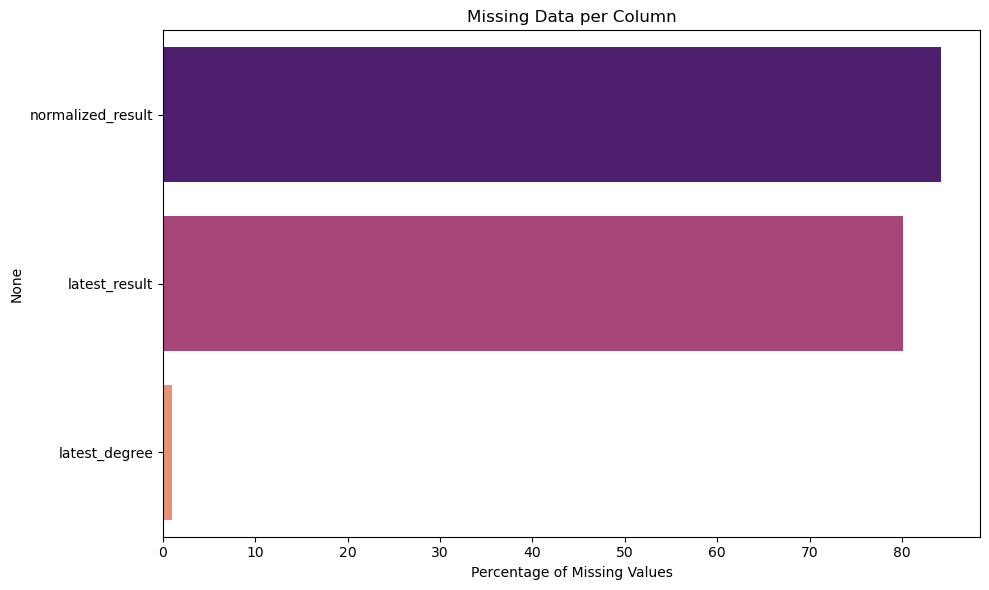

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

missing_pct = updated_resume_data.isnull().mean().sort_values(ascending=False) * 100
missing_pct = missing_pct[missing_pct > 0]

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_pct.values, y=missing_pct.index, palette="magma", legend = False)
plt.xlabel("Percentage of Missing Values")
plt.title("Missing Data per Column")
plt.tight_layout()
plt.show()

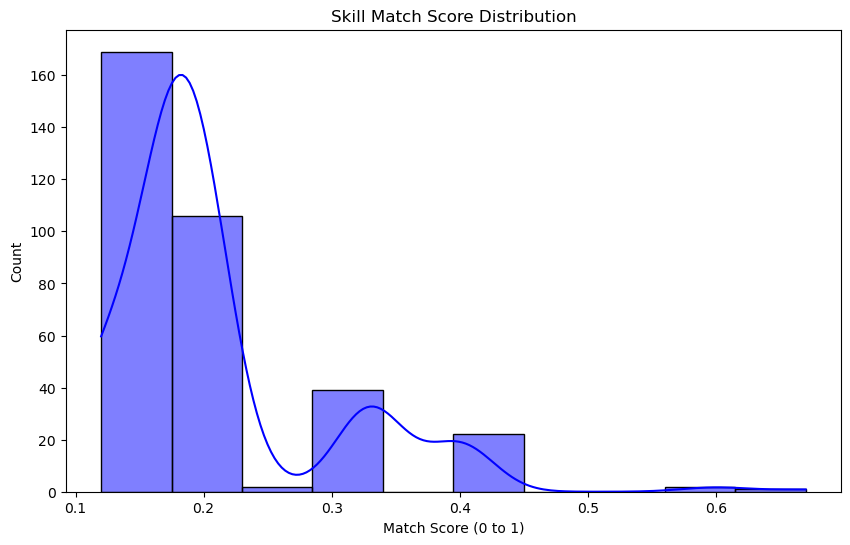

In [ ]:
#Visualization for Skill match score :

import seaborn as sns

plt.figure(figsize=(10, 6))
sample_data = updated_resume_data[updated_resume_data['skill_match_score'] > 0]
sns.histplot(sample_data['skill_match_score'], bins = 10, color = 'blue', kde= True )
plt.title("Skill Match Score Distribution")
plt.xlabel("Match Score (0 to 1)")
plt.show()

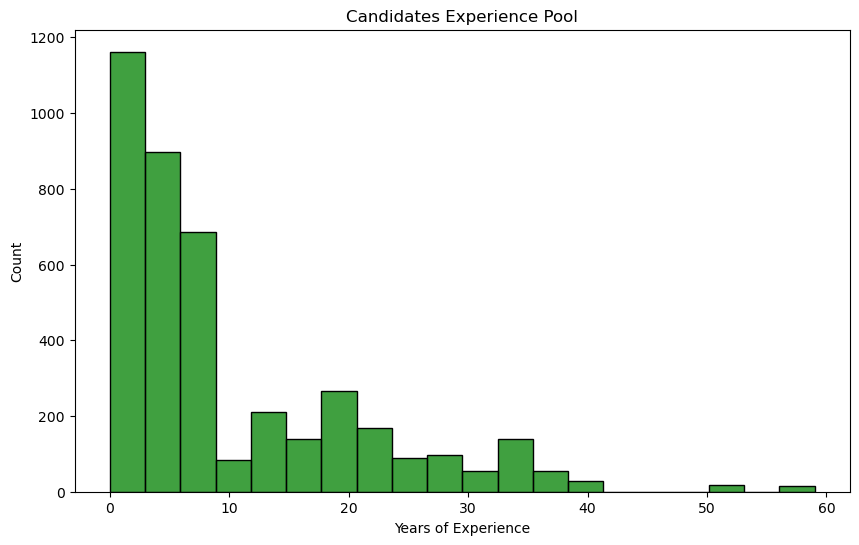

In [ ]:
#Plotting how Experienced the candidate pool is
plt.figure(figsize=(10,6))
sns.histplot(updated_resume_data['experience_years'], bins = 20, color = 'green')
plt.title("Candidates Experience Pool")
plt.xlabel("Years of Experience")
plt.ylabel("Count")
plt.show()